# BASE DATA LOADING 

In [1]:
dim = 128
# file_path = "/content/drive/MyDrive/Furcation-classification/Deciduous_2019"
file_path = "./Dataset/All_data/"
resize_sz = (dim, dim)


# AUGMENTED DATA LOADING

In [1]:
import json
import numpy as np
import cv2
import os
from glob import glob
# from utils import *
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam


In [2]:
x  = np.load("aug_images_train.npy")
Labels = np.load("aug_label_train.npy")

In [3]:
x.shape

(3552, 128, 128, 3)

In [4]:
X_train , X_test, y_train , y_test = x ,np.load("./data/test_image.npy") , Labels , np.load("./data/test_label.npy")

In [5]:
normal_imgss = [np.dstack((X_test[i], X_test[i], X_test[i])) for i in range(0,len(X_test))]
# imgss = [np.stack((imgs[i], imgs[i], imgs[i]), axis=2) for i in range(0,len(imgs_test))]
X_test = np.array(normal_imgss)

In [6]:
y_train

array([[2],
       [2],
       [2],
       ...,
       [2],
       [3],
       [2]], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

# Densenet


In [38]:
dim = 128
input_shape = (dim,dim, 3)
nclass = 4

base_model = applications.DenseNet201(weights='imagenet', 
                                include_top=False, 
                                input_shape=(dim,dim,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(keras.layers.Flatten())
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(1024, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(256, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(64, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(Dense(nclass, activation='softmax'))

model = add_model
model.compile(optimizer = Adam(learning_rate=0.0001,beta_1=0.95,beta_2=0.9996,epsilon=1e-08) ,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 flatten_4 (Flatten)         (None, 30720)             0         
                                                                 
 batch_normalization_16 (Bat  (None, 30720)            122880    
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 1024)              31458304  
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_17 (Bat  (None, 1024)             4096      
 chNormalization)                                     

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0002, mode='min')
# checkpoint = ModelCheckpoint("resnet_v250", monitor='val_accuracy',
#                              save_weights_only=True, mode='max', verbose=1)
earlyStop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=1,
    mode='auto',
    restore_best_weights=True,
)
callbacks = [PlotLossesKerasTF(), reduce_lr, earlyStop]


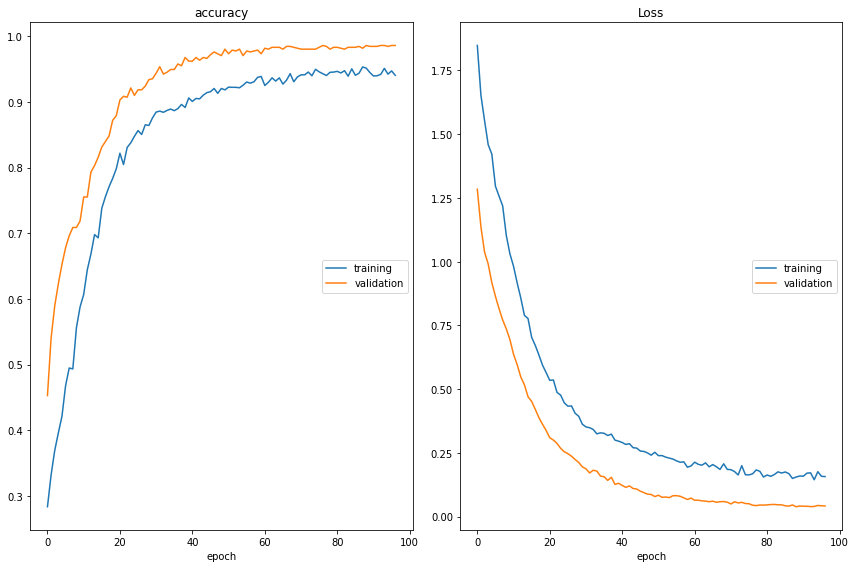

accuracy
	training         	 (min:    0.284, max:    0.953, cur:    0.941)
	validation       	 (min:    0.453, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.145, max:    1.848, cur:    0.157)
	validation       	 (min:    0.039, max:    1.284, cur:    0.042)
Restoring model weights from the end of the best epoch: 89.
89/89 [==============================] - 8s 95ms/step - loss: 0.1572 - accuracy: 0.9405 - val_loss: 0.0418 - val_accuracy: 0.9859 - lr: 1.0000e-04
Epoch 00097: early stopping


In [40]:
history = model.fit(X_train,y_train,batch_size = 32,
                              epochs=100, 
                              shuffle=True, 
                              verbose=True,
                              validation_split=0.2,
                              callbacks=callbacks,
                              )

In [41]:
import matplotlib.pyplot as plt 

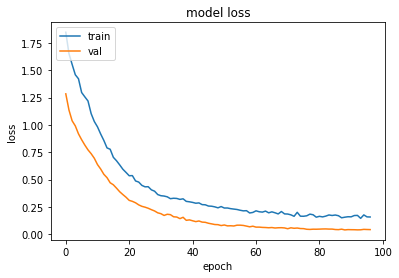

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model.save("saved_model/densenet201")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [8]:
from tensorflow import keras
model = keras.models.load_model('saved_model/densenet201')

In [9]:
x.shape 

(3552, 128, 128, 3)

In [10]:
X_test.shape

(222, 128, 128, 3)

In [11]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [14]:
y_pred_new = []
for i  in y_pred : 
    y_pred_new.append(i.argmax(axis=0))

In [15]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test,y_pred_new))

[[[162  20]
  [ 32   8]]

 [[ 80  52]
  [ 50  40]]

 [[ 80  58]
  [ 43  41]]

 [[212   2]
  [  7   1]]]


In [16]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_new)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.28571429 0.43478261 0.41414141 0.33333333]
recall: [0.2        0.44444444 0.48809524 0.125     ]
fscore: [0.23529412 0.43956044 0.44808743 0.18181818]
support: [40 90 84  8]


In [19]:
from sklearn.metrics import multilabel_confusion_matrix , accuracy_score
import matplotlib.pyplot as plt 

mx = multilabel_confusion_matrix(y_test,y_pred_new)
acc = accuracy_score(y_test,y_pred_new)
print(acc)

0.40540540540540543


: 